# Customer Segmentation using DBSCAN

Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.simplefilter("ignore")

Importing Mall dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploritory Data Analysis

In [4]:
#checking for dimensions
print(df.shape)

(200, 5)


In [5]:
#checking for na values 
print(df.isna().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
#information about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
#Viewing integer columns 
int_cols = df.select_dtypes(include = "int64").columns.tolist()
int_cols

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [8]:
#Viewing object columns
obj_cols = df.select_dtypes(include = "O").columns.tolist()
obj_cols

['Genre']

In [13]:
#removing CustomerID column
df = df.drop("CustomerID", axis = 1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
#Desciptive Statistics of Dataset
print(df.describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


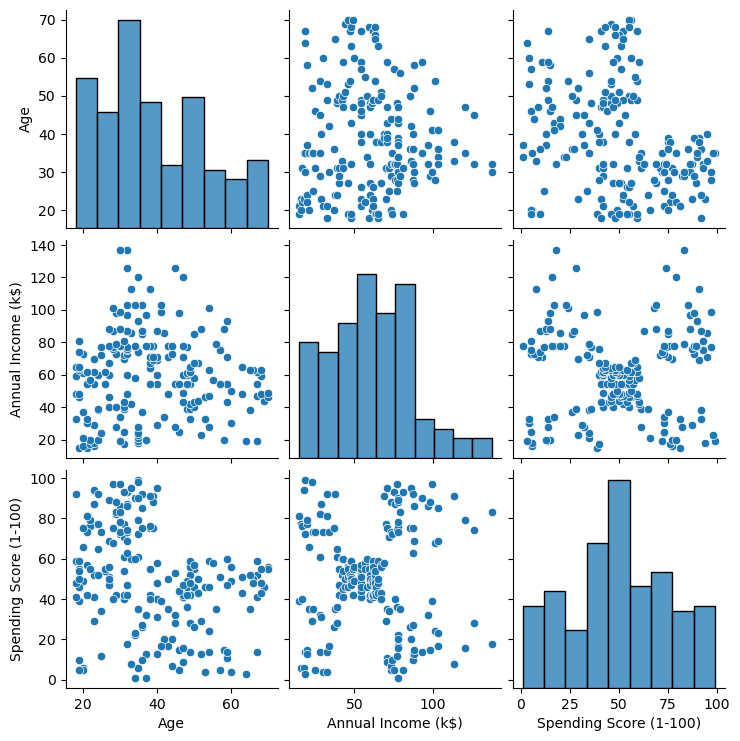

In [15]:
#pairplot using seaborn
sn.pairplot(data=df)

In [16]:
x = df["Annual Income (k$)"]
y = df["Spending Score (1-100)"]
print(x)
print(y)

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64
0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64


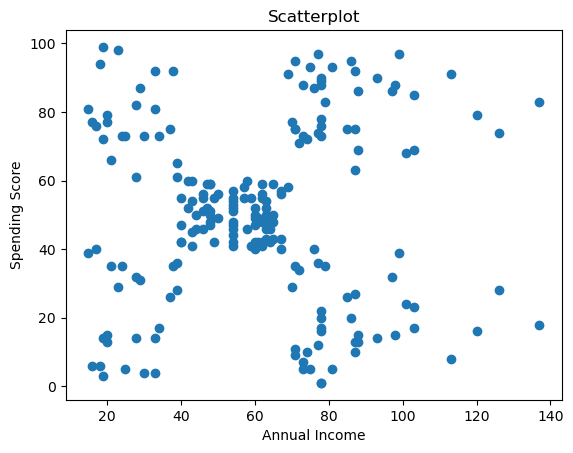

In [17]:
#scatterplot between Annual Income and Spending score
plt.scatter(x,y)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Scatterplot")
plt.show()

converting gender to binary

In [18]:
df["Genre"].replace({"Male":1, "Female":0}, inplace=True)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [20]:
# Scaling desired columns for modelling
scaler=StandardScaler()
scaled_val=scaler.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])

In [21]:
scaled_val[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [22]:
df1 = pd.DataFrame(scaled_val, columns = df.columns[2:4].tolist())
df1

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


# DBSCAN Algorithm

In [24]:
dbscan=DBSCAN(eps=0.5,min_samples=10,metric="euclidean")    
dbscan.fit(df1)
y_pred=dbscan.fit_predict(df1)

In [25]:
dbscan

DBSCAN(min_samples=10)

In [26]:
y_pred

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2,  3,
       -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [27]:
dbscan.labels_

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2,  3,
       -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

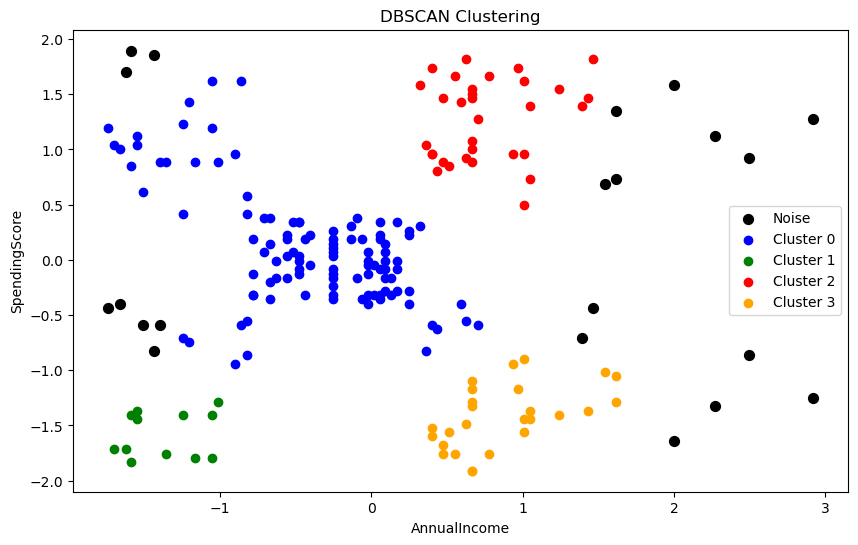

In [31]:
# Plotting for clusters visualization
clr=["blue","green","red","orange","purple"]

plt.figure(figsize=(10,6))
for i in np.unique(y_pred):
    if i==-1:
        plt.scatter(df1[y_pred== i]['Annual Income (k$)'],df1[y_pred== i]['Spending Score (1-100)'],s=50,c="black",label="Noise")
    else:
        plt.scatter(df1[y_pred== i]['Annual Income (k$)'],df1[y_pred== i]['Spending Score (1-100)'],label=f"Cluster {i}",c=clr[i])

plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()